# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 1000

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 1000 total reviews
Scraping page 2
   ---> 2000 total reviews
Scraping page 3
   ---> 3000 total reviews
Scraping page 4
   ---> 3544 total reviews
Scraping page 5
   ---> 3544 total reviews
Scraping page 6
   ---> 3544 total reviews
Scraping page 7
   ---> 3544 total reviews
Scraping page 8
   ---> 3544 total reviews
Scraping page 9
   ---> 3544 total reviews
Scraping page 10
   ---> 3544 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

reviews
0  Not Verified | Only the second time flying BA ...
1  ✅ Trip Verified | I wasn't going to bother rev...
2  ✅ Trip Verified |  I booked business class tic...
3  ✅ Trip Verified |  I will never travel with Br...
4  ✅ Trip Verified |  I am already in Portugal so...

In [4]:
df.to_csv("data/BA_reviews.csv")

In [5]:
# reading data from csv
df = pd.read_csv('data/BA_reviews.csv')
df.head(20)

Unnamed: 0                                            reviews
0            0  Not Verified | Only the second time flying BA ...
1            1  ✅ Trip Verified | I wasn't going to bother rev...
2            2  ✅ Trip Verified |  I booked business class tic...
3            3  ✅ Trip Verified |  I will never travel with Br...
4            4  ✅ Trip Verified |  I am already in Portugal so...
5            5  ✅ Trip Verified |  Terrible. Avoid this airlin...
6            6  ✅ Trip Verified |  Despite being a gold member...
7            7  Not Verified | Regarding the aircraft and seat...
8            8  Not Verified | I travelled with British Airway...
9            9  Not Verified |  Food was lousy. Who ever is pl...
10          10  ✅ Trip Verified | Had the worst experience. Th...
11          11  ✅ Trip Verified |  The ground staff were not h...
12          12  ✅ Trip Verified |  Second time BA Premium Econ...
13          13  Not Verified |  They changed our Flights from ...
14          14  Not Verified |  At Copenhagen the most chaotic...
15          15  ✅ Trip Verified |  Worst experience of my life...
16          16  ✅ Trip Verified |  Due to code sharing with Ca...
17          17  ✅ Trip Verified |  LHR check in was quick at t...
18          18  ✅ Trip Verified |  I wouldn't recommend Britis...
19          19  ✅ Trip Verified |  Absolutely horrible experie...

In [6]:
# dropping first column as it was not required
df = df.drop(columns=df.columns[0])

In [7]:
# Apply regex to the 'reviews' column
df['reviews'] = df['reviews'].str.replace(r'(?:✅ Trip Verified \|)|(?:Not Verified \|)', '', regex=True)

# Print the updated DataFrame
print(df)

                                                reviews
0      Only the second time flying BA as first time ...
1      I wasn't going to bother reviewing this fligh...
2       I booked business class tickets for my fianc...
3       I will never travel with British Airways aga...
4       I am already in Portugal so contacted them t...
...                                                 ...
3539  Flew LHR - VIE return operated by bmi but BA a...
3540  LHR to HAM. Purser addresses all club passenge...
3541  My son who had worked for British Airways urge...
3542  London City-New York JFK via Shannon on A318 b...
3543  SIN-LHR BA12 B747-436 First Class. Old aircraf...

[3544 rows x 1 columns]


In [8]:
#Loading NLTK libraries for Stop Words
import nltk 
#nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{"that'll", 'other', 'aren', "hasn't", 'doesn', 'have', 'about', "you've", 'these', 'further', 't', 'if', "it's", "wouldn't", 'both', "haven't", 'very', "she's", 'ours', 'having', 'him', "you'd", 'at', 'mustn', 'haven', 'we', 'theirs', 'me', "won't", 'down', 'couldn', 'where', 'what', 'above', 'that', 'should', 'how', 'hers', 'this', 'few', 'more', 'don', 'ain', "doesn't", 'y', 've', 'myself', 'again', 'than', 'from', "mightn't", 'there', 'his', 'yourself', 'is', 'such', 'needn', 'd', "should've", 'now', 'her', 's', 'yours', 'which', 'over', 'themselves', 'in', 'wasn', 'doing', "weren't", "shan't", 'but', 'by', 'being', 'here', 'or', 'whom', 'each', 'hasn', 'too', 'nor', 'why', 'through', 'same', 'were', 'was', 'ourselves', 'am', 'until', 'our', 'on', 'some', "wasn't", 'up', 'the', "hadn't", 'with', 'under', 'been', 'will', "couldn't", 'll', 'all', 'most', 'are', 'my', 'hadn', 'weren', "didn't", 'because', 'didn', 'itself', 'below', 'their', 'i', 'mightn', 'a', 'during', 'not', 'm', 'y

In [11]:
#Tokenizing and creating pipeline
import regex as re

def tokenize(text):
    text = re.sub(r'http\S+', '', text)  # replace URLs with <URL> token
    text = re.sub(r'#\w+', lambda x: x.group().lower(), text)  # lowercase hashtags
    text = re.sub(r'<[^<>]*>', ' ', text)
    # markdown URLs like [Some text](https://....)
    text = re.sub(r'\[([^\[\]]*)\]\([^\(\)]*\)', r'\1', text)
    # text or code in brackets like [0]
    text = re.sub(r'\[[^\[\]]*\]', ' ', text)
    # standalone sequences of specials, matches  but not #cool
    text = re.sub(r'(?:^|\s)[<>{}\[\]+|\\:-]{1,}(?:\s|$)', ' ', text)
    # standalone sequences of hyphens like --- or ==
    text = re.sub(r'(?:^|\s)[\-=\+]{2,}(?:\s|$)', ' ', text)
    # sequences of white spaces
    text = re.sub(r'\s+', ' ', text)
    return [t for t in re.findall(r'\b\w+\b', text) if not t.isdigit()]

def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens
df['tokens'] = df['reviews'].apply(prepare, pipeline=pipeline)

In [12]:
# Creting Frequency and Counts for the words
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

freq
token        
flight   6366
ba       4561
service  2715
seat     2330
food     2306
london   2160
crew     2096
british  2065
airways  2049
seats    2042

In [13]:
import numpy as np
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
    # count tokens
    counter = Counter()
    df[column].map(update)
    # create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df
idf_df = compute_idf(df)

In [15]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()

freq        tfidf
token                     
flight   6366  2406.015782
ba       4561  2825.614310
service  2715  2250.090628
seat     2330  2627.809362
food     2306  1999.089688

# WordCloud for Word Frequency of reviews

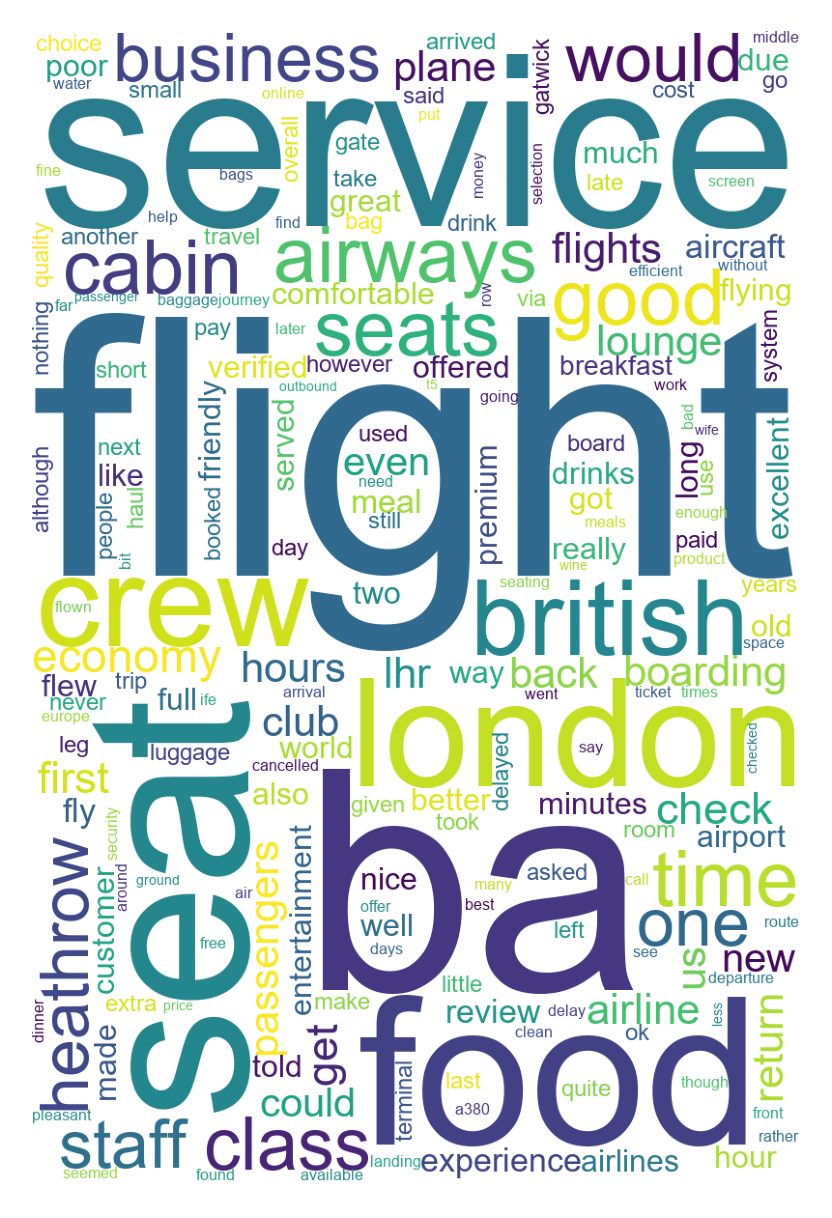

In [17]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

wc = WordCloud(background_color='white', width=400, height=600, margin=2, scale=2, font_path='arial.ttf', max_words=200, max_font_size=300)
wc.fit_words(freq_df['freq'].to_dict())
plt.figure(figsize=(6, 4), facecolor=None, dpi=300)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad=0.5)  
plt.show()

# WordCloud for Word Frequency - TFIDF

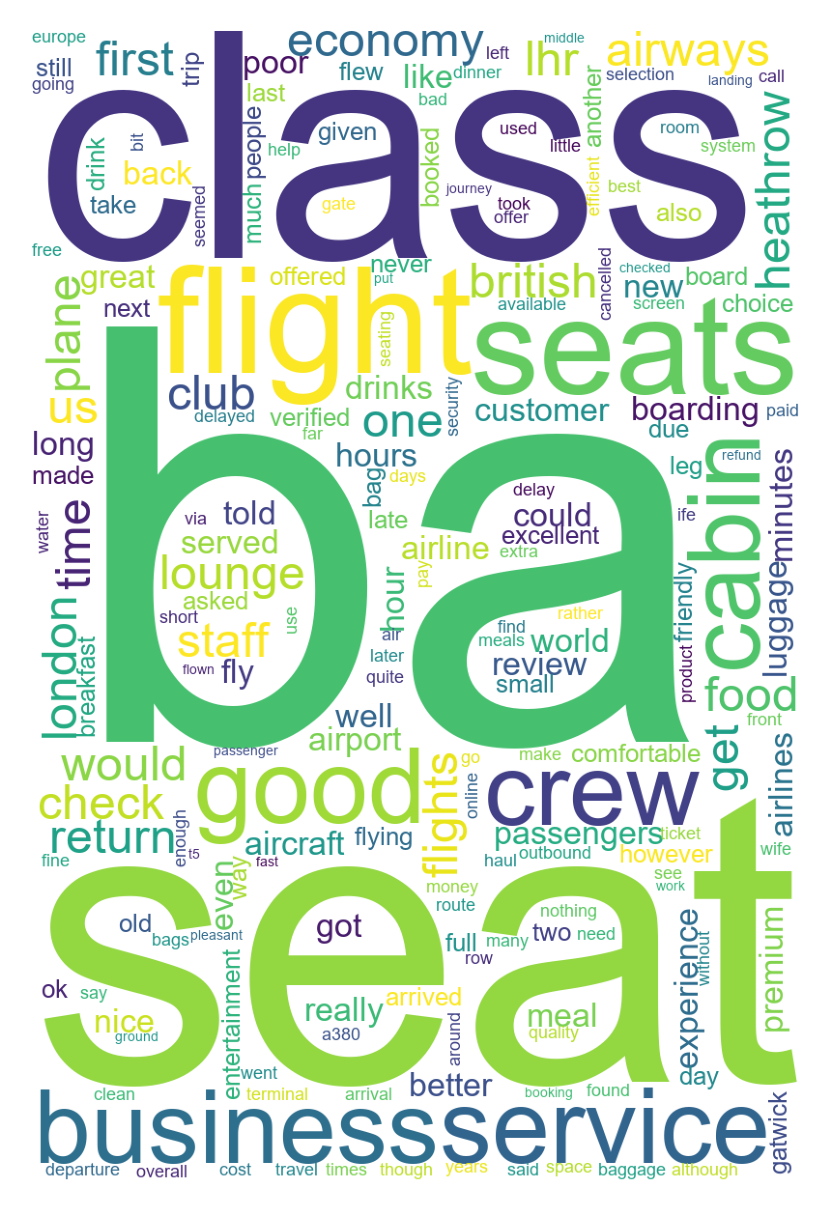

In [18]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

wc = WordCloud(background_color='white', width=400, height=600, margin=2, scale=2, font_path='arial.ttf', max_words=200, max_font_size=300)
wc.fit_words(freq_df['tfidf'].to_dict())
plt.figure(figsize=(6, 4), facecolor=None, dpi=300)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad=0.5)  
plt.show()

# Sentiment Analysis

In [19]:
from sklearn import preprocessing
import nltk
#nltk.download('opinion_lexicon')
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize

print('Total number of words in opinion lexicon', len(opinion_lexicon.words()))
print('Examples of positive words in opinion lexicon',
      opinion_lexicon.positive()[:10])
print('Examples of negative words in opinion lexicon',
      opinion_lexicon.negative()[:10])

Total number of words in opinion lexicon 6789
Examples of positive words in opinion lexicon ['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation']
Examples of negative words in opinion lexicon ['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted']


In [20]:
# Let's create a dictionary which we can use for scoring our review text
#nltk.download('punkt')
df.rename(columns={"reviewText": "tweet_text"}, inplace=True)
pos_score = 1
neg_score = -1
word_dict = {}
 
# Adding the positive words to the dictionary
for word in opinion_lexicon.positive():
        word_dict[word] = pos_score
      
# Adding the negative words to the dictionary
for word in opinion_lexicon.negative():
        word_dict[word] = neg_score

In [21]:
def bing_liu_score(text):
    sentiment_score = 0
    bag_of_words = word_tokenize(text.lower())
    for word in bag_of_words:
        if word in word_dict:
            sentiment_score += word_dict[word]
    return sentiment_score  

In [22]:
df['reviews'].fillna('no review', inplace=True)
df['Bing_Liu_Score'] = df['reviews'].apply(bing_liu_score)

In [25]:
df[['reviews','Bing_Liu_Score']].head(10)

reviews  Bing_Liu_Score
0   Only the second time flying BA as first time ...               4
1   I wasn't going to bother reviewing this fligh...              -2
2    I booked business class tickets for my fianc...              -1
3    I will never travel with British Airways aga...              -5
4    I am already in Portugal so contacted them t...              -1
5    Terrible. Avoid this airline. It’s now becom...              -3
6    Despite being a gold member, the British Air...               1
7   Regarding the aircraft and seat: The business...               4
8   I travelled with British Airways from Sweden ...              -2
9    Food was lousy. Who ever is planning the Asi...              -2

In [27]:
df.groupby('reviews').agg({'Bing_Liu_Score':'mean'})
#Negative = 1, neutral = 2, positive = 3 

Bing_Liu_Score
reviews                                                           
 \r\nBA34 KUL-LHR 6 Sept, return BA11 LHR-SIN-K...             3.0
 \r\nBA’s Galleries lounge at CPT is adequate b...            -4.0
 \r\nFantastic flight. Travelled solo from Lond...            11.0
 \r\nI would like to compliment British Airways...             4.0
 \r\nLondon Heathrow / Pisa return. My wife and...            12.0
...                                                            ...
❎ Unverified |  London to Barbados. Having used...             3.0
❎ Unverified |  London to Hong Kong. The Avios ...             1.0
❎ Unverified |  London to Reykjavik. I can't re...            -6.0
❎ Unverified |  Oh dear: cost-cutting on Britis...             1.0
❎ Unverified |  Rome to Heathrow. Having used B...            -3.0

[3542 rows x 1 columns]

# LDA TOPIC MODELING

In [30]:
import re
df["paragraphs"] = df["reviews"].map(lambda text: re.split('\.\s*\n', text))
pipeline = [
    lambda text: re.sub(r'http\S+', '', text),  # replace URLs with empty string
    lambda text: re.sub(r'\.\s*\n', '', text),  
    lambda text: re.sub(r'#\w+', lambda x: x.group().lower(), text),  # lowercase hashtags
    lambda text: re.sub(r'<[^<>]*>', ' ', text),  # remove HTML tags
    lambda text: re.sub(r'\[([^\[\]]*)\]\([^\(\)]*\)', r'\1', text),  # remove markdown URLs
    lambda text: re.sub(r'\[[^\[\]]*\]', ' ', text),  # remove text/code in brackets
    lambda text: re.sub(r'(?:^|\s)[<>{}\[\]+|\\:-]{1,}(?:\s|$)', ' ', text),  # remove standalone sequences of specials
    lambda text: re.sub(r'(?:^|\s)[\-=\+]{2,}(?:\s|$)', ' ', text),  # remove sequences of hyphens
    lambda text: re.sub(r'\s+', ' ', text),  # remove sequences of white spaces
    lambda text: [t for t in re.findall(r'\b\w+\b', text) if not t.isdigit()]  # tokenize and remove digits
]
df["paragraphs"] = df['reviews'].apply(lambda text: prepare(text, pipeline))
df["number_of_paragraphs"] = df["paragraphs"].map(len)

In [31]:
#Getting TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords
tfidf_text_vectorizer = TfidfVectorizer(stop_words=stopwords, min_df=5, max_df=0.7)
paragraphs = [para for sublist in df["paragraphs"] for para in sublist]
tfidf_text_vectorizer = TfidfVectorizer(stop_words=stopwords, min_df=5, max_df=0.7)
tfidf_text_vectors = tfidf_text_vectorizer.fit_transform(paragraphs)
tfidf_text_vectors.shape

C:\Users\niksh\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(567961, 4466)

In [32]:
from sklearn.decomposition import NMF

nmf_text_model = NMF(n_components=10, random_state=42)
W_text_matrix = nmf_text_model.fit_transform(tfidf_text_vectors)
H_text_matrix = nmf_text_model.components_

C:\Users\niksh\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


In [33]:
def display_topics(model, features, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1] # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print("  %s (%2.2f)" % (features[largest[i]], abs(words[largest[i]]*100.0/total)))
display_topics(nmf_text_model, tfidf_text_vectorizer.get_feature_names()) 


Topic 00
  flight (100.00)
  economy (0.00)
  check (0.00)
  flights (0.00)
  club (0.00)

Topic 01
  ba (100.00)
  time (0.00)
  cabin (0.00)
  business (0.00)
  heathrow (0.00)

Topic 02
  service (100.00)
  time (0.00)
  cabin (0.00)
  business (0.00)
  heathrow (0.00)

Topic 03
  seat (100.00)
  good (0.00)
  staff (0.00)
  flights (0.00)
  club (0.00)

Topic 04
  food (100.00)
  good (0.00)
  time (0.00)
  cabin (0.00)
  class (0.00)

Topic 05
  london (100.00)
  good (0.00)
  time (0.00)
  class (0.00)
  business (0.00)

Topic 06
  crew (100.00)
  good (0.00)
  class (0.00)
  staff (0.00)
  return (0.00)

Topic 07
  british (99.99)
  good (0.01)
  class (0.00)
  staff (0.00)
  flights (0.00)

Topic 08
  airways (99.97)
  time (0.03)
  cabin (0.00)
  business (0.00)
  heathrow (0.00)

Topic 09
  seats (100.00)
  economy (0.00)
  club (0.00)
  lhr (0.00)
  boarding (0.00)


C:\Users\niksh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [34]:
tfidf_para_vectorizer = TfidfVectorizer(stop_words=stopwords, min_df=5, max_df=0.7)
paragraphs = [para for sublist in df["paragraphs"] for para in sublist]
tfidf_para_vectors = tfidf_para_vectorizer.fit_transform(paragraphs)
tfidf_para_vectors.shape

C:\Users\niksh\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(567961, 4466)

In [35]:
nmf_para_model = NMF(n_components=10, random_state=42)
W_para_matrix = nmf_para_model.fit_transform(tfidf_para_vectors)
H_para_matrix = nmf_para_model.components_
display_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names())

C:\Users\niksh\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(



Topic 00
  flight (100.00)
  economy (0.00)
  check (0.00)
  flights (0.00)
  club (0.00)

Topic 01
  ba (100.00)
  time (0.00)
  cabin (0.00)
  business (0.00)
  heathrow (0.00)

Topic 02
  service (100.00)
  time (0.00)
  cabin (0.00)
  business (0.00)
  heathrow (0.00)

Topic 03
  seat (100.00)
  good (0.00)
  staff (0.00)
  flights (0.00)
  club (0.00)

Topic 04
  food (100.00)
  good (0.00)
  time (0.00)
  cabin (0.00)
  class (0.00)

Topic 05
  london (100.00)
  good (0.00)
  time (0.00)
  class (0.00)
  business (0.00)

Topic 06
  crew (100.00)
  good (0.00)
  class (0.00)
  staff (0.00)
  return (0.00)

Topic 07
  british (99.99)
  good (0.01)
  class (0.00)
  staff (0.00)
  flights (0.00)

Topic 08
  airways (99.97)
  time (0.03)
  cabin (0.00)
  business (0.00)
  heathrow (0.00)

Topic 09
  seats (100.00)
  economy (0.00)
  club (0.00)
  lhr (0.00)
  boarding (0.00)


C:\Users\niksh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [36]:
W_text_matrix.sum(axis=0)/W_text_matrix.sum()*100.0

array([18.4950203 , 14.40289819,  9.7608242 ,  8.70309438,  8.63577292,
        8.22244192,  8.03904288,  7.95006498,  7.90739611,  7.88344411])

In [37]:
W_para_matrix.sum(axis=0)/W_para_matrix.sum()*100.0

array([18.4950203 , 14.40289819,  9.7608242 ,  8.70309438,  8.63577292,
        8.22244192,  8.03904288,  7.95006498,  7.90739611,  7.88344411])

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
count_para_vectorizer = CountVectorizer(stop_words=stopwords, min_df=5, max_df=0.7)
paragraphs = [para for sublist in df["paragraphs"] for para in sublist]
count_para_vectors = count_para_vectorizer.fit_transform(paragraphs)
count_para_vectors.shape
from sklearn.decomposition import LatentDirichletAllocation

lda_para_model = LatentDirichletAllocation(n_components = 10, random_state=42)
W_lda_para_matrix = lda_para_model.fit_transform(count_para_vectors)
H_lda_para_matrix = lda_para_model.components_

C:\Users\niksh\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


In [39]:
from sklearn.feature_extraction.text import CountVectorizer
count_para_vectorizer = CountVectorizer(stop_words=stopwords, min_df=5, max_df=0.7)
paragraphs = [para for sublist in df["paragraphs"] for para in sublist]
count_para_vectors = count_para_vectorizer.fit_transform(paragraphs)
count_para_vectors.shape

(567961, 4466)

In [41]:
display_topics(lda_para_model, count_para_vectorizer.get_feature_names())


Topic 00
  food (8.90)
  check (4.75)
  flights (4.32)
  lounge (3.83)
  airline (3.74)

Topic 01
  cabin (7.17)
  class (6.74)
  staff (5.64)
  passengers (3.63)
  review (3.17)

Topic 02
  service (10.67)
  crew (8.24)
  boarding (3.83)
  long (2.81)
  premium (2.61)

Topic 03
  heathrow (5.81)
  hours (3.87)
  verified (3.04)
  hour (2.98)
  nice (2.31)

Topic 04
  london (9.08)
  plane (4.22)
  new (3.72)
  old (2.56)
  flying (2.53)

Topic 05
  flight (20.16)
  ba (14.44)
  airways (6.49)
  economy (4.36)
  lhr (3.31)

Topic 06
  seats (8.80)
  good (8.74)
  poor (2.67)
  way (2.51)
  asked (2.19)

Topic 07
  seat (10.59)
  time (9.07)
  return (4.90)
  comfortable (3.02)
  minutes (2.95)

Topic 08
  british (8.80)
  aircraft (3.59)
  meal (3.55)
  better (2.91)
  airport (2.62)

Topic 09
  business (5.88)
  club (4.11)
  experience (3.40)
  fly (3.27)
  told (2.87)


In [42]:
W_lda_para_matrix.sum(axis=0)/W_lda_para_matrix.sum()*100.0

array([10.04870933, 10.14123329, 10.00618881, 10.01508026,  9.86102039,
       10.54689495,  9.80864003,  9.70317504,  9.83320158, 10.03585634])

In [43]:
import pyLDAvis.sklearn

lda_display = pyLDAvis.sklearn.prepare(lda_para_model, count_para_vectors, count_para_vectorizer, sort_topics=False)
pyLDAvis.display(lda_display)

C:\Users\niksh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\niksh\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

def wordcloud_topics(model, features, no_top_words=40):
    for topic, words in enumerate(model.components_):
        size = {}
        largest = words.argsort()[::-1] # invert sort order
        for i in range(0, no_top_words):
            size[features[largest[i]]] = abs(words[largest[i]])
        wc = WordCloud(background_color="white", max_words=100, width=960, height=540)
        wc.generate_from_frequencies(size)
        plt.figure(figsize=(12,12))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        # if you don't want to save the topic model, comment the next line
        plt.savefig(f'topic{topic}.png')

# LDA Worcloud

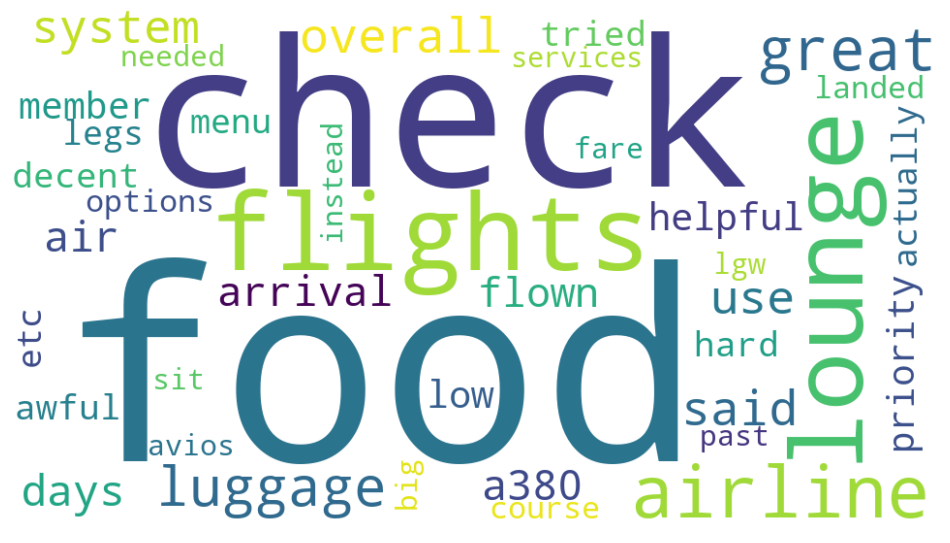

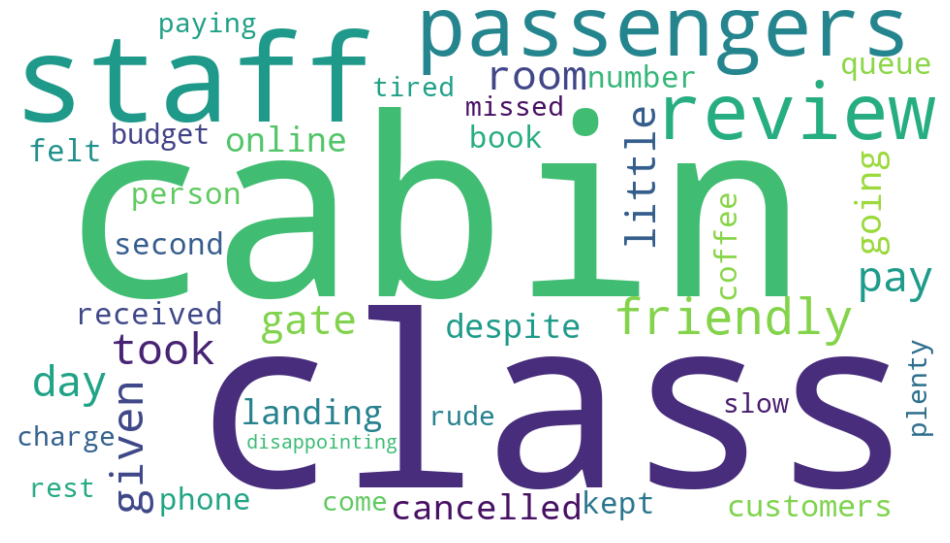

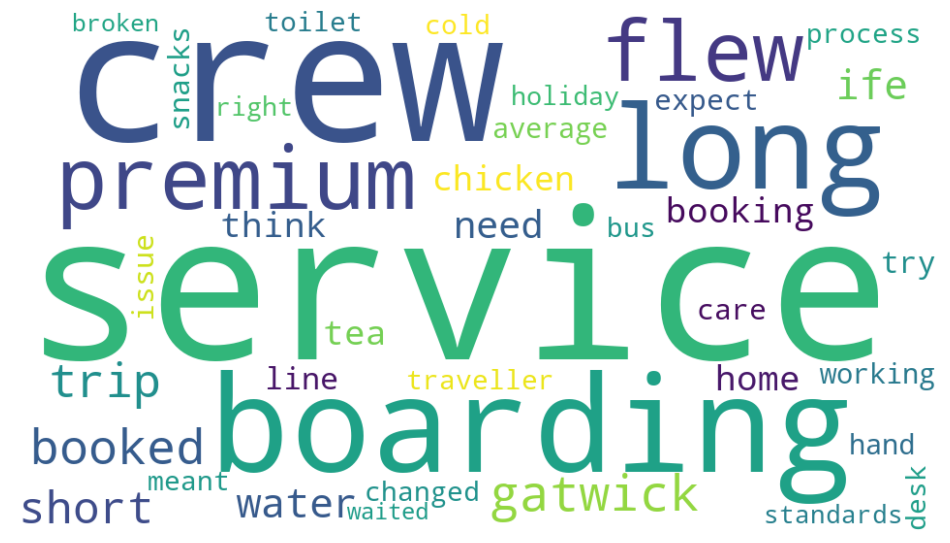

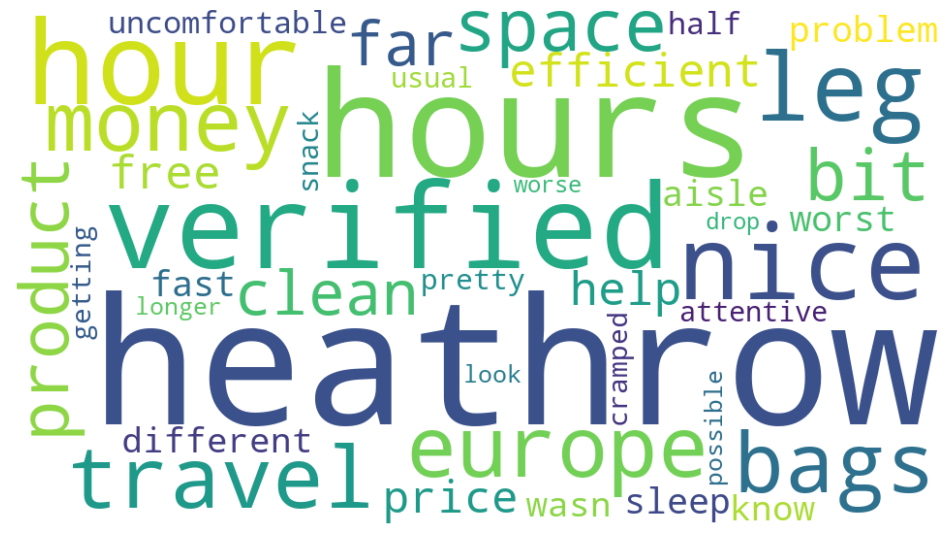

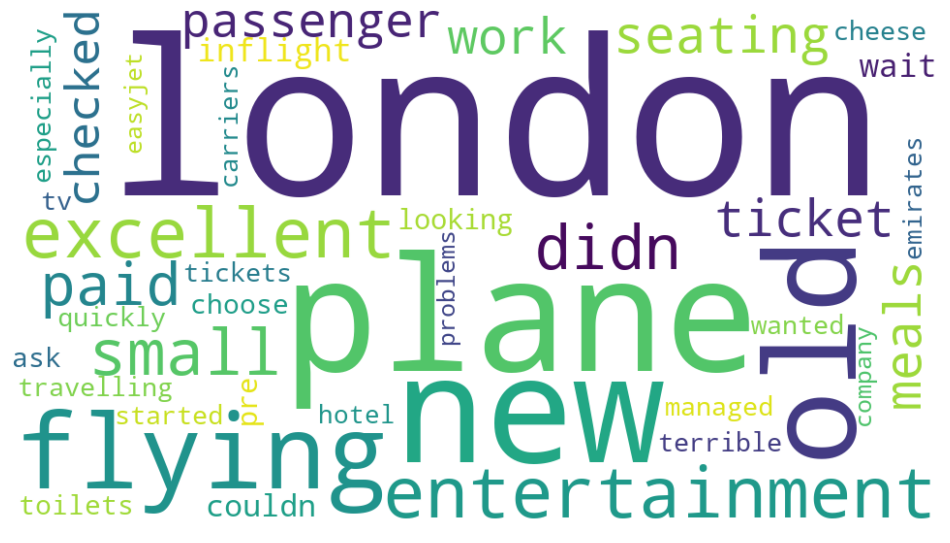

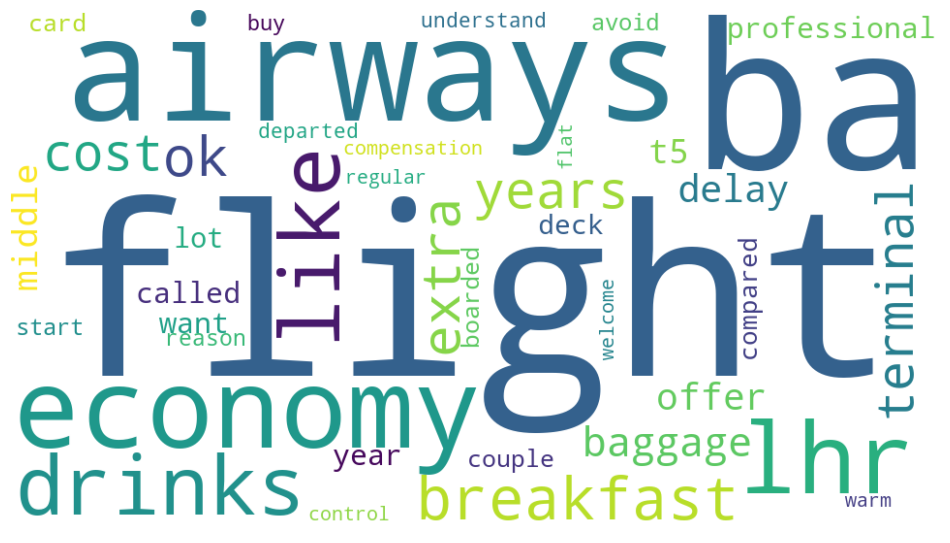

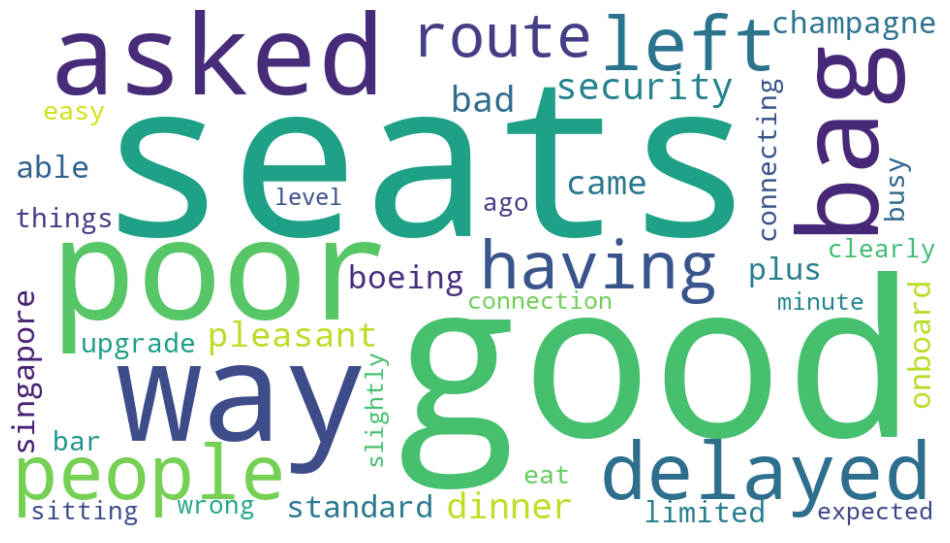

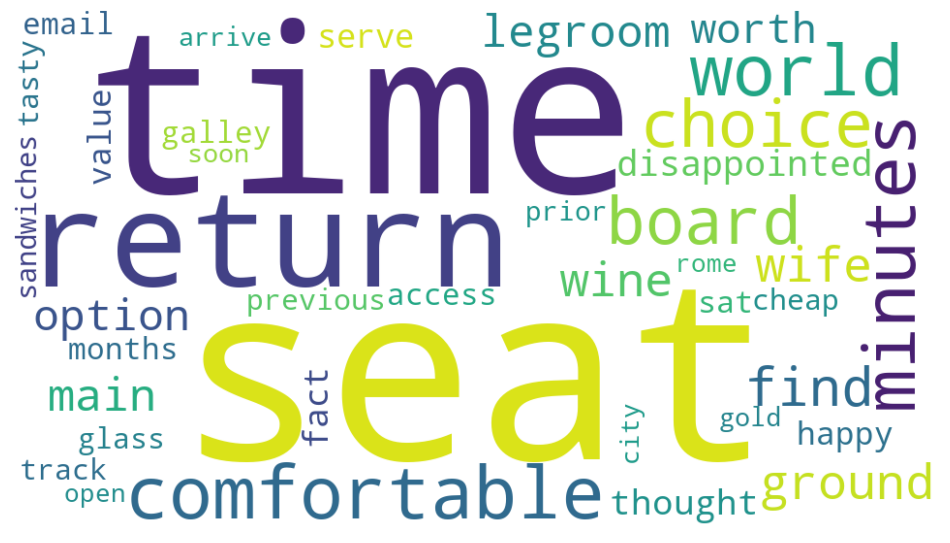

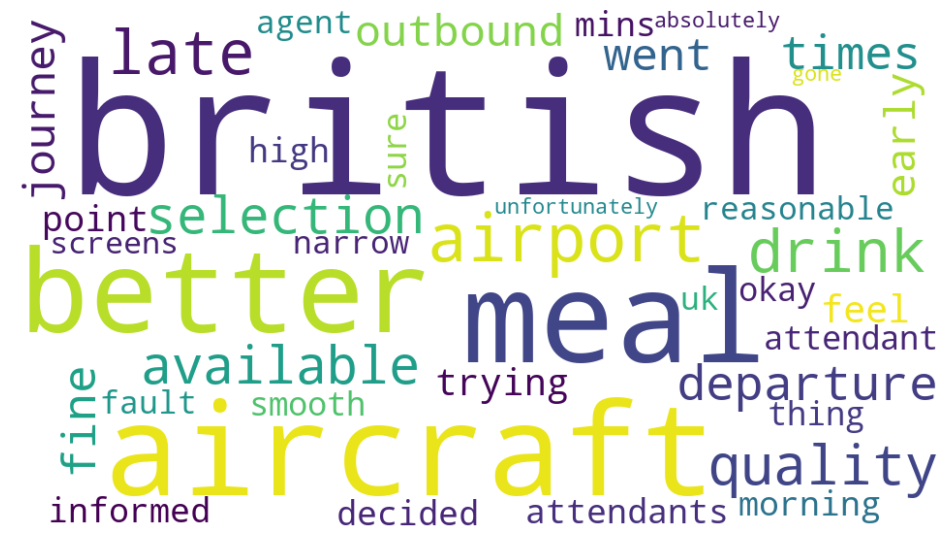

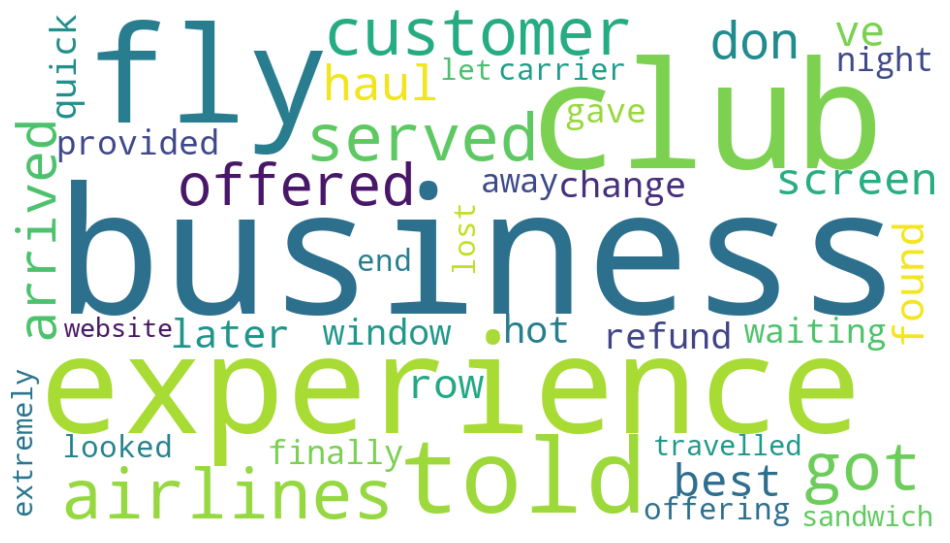

In [46]:
import warnings
warnings.filterwarnings('ignore')
wordcloud_topics(lda_para_model, count_para_vectorizer.get_feature_names())

# NMF Wordcloud 

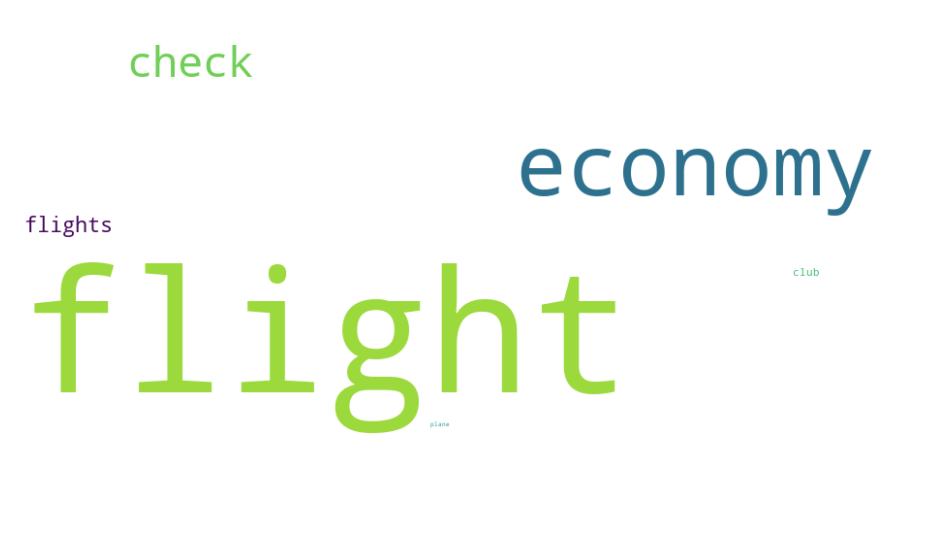

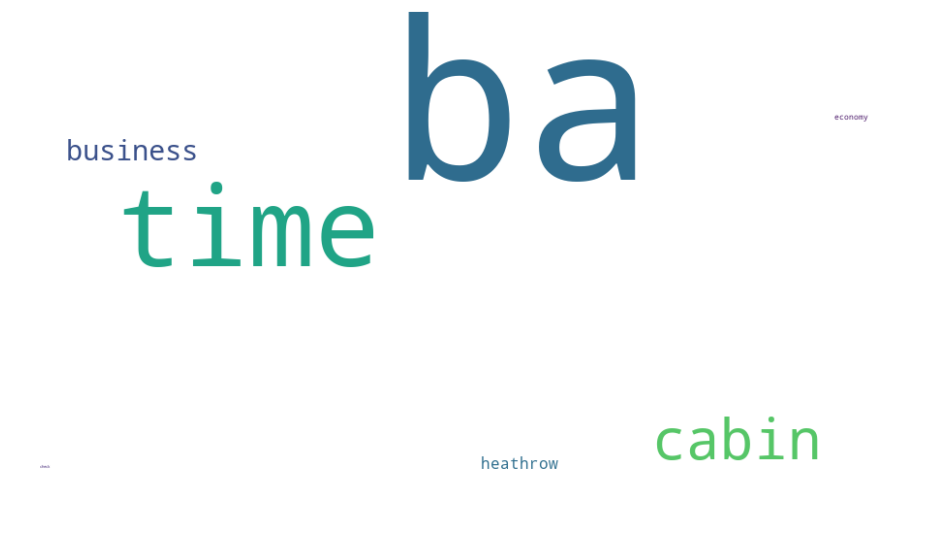

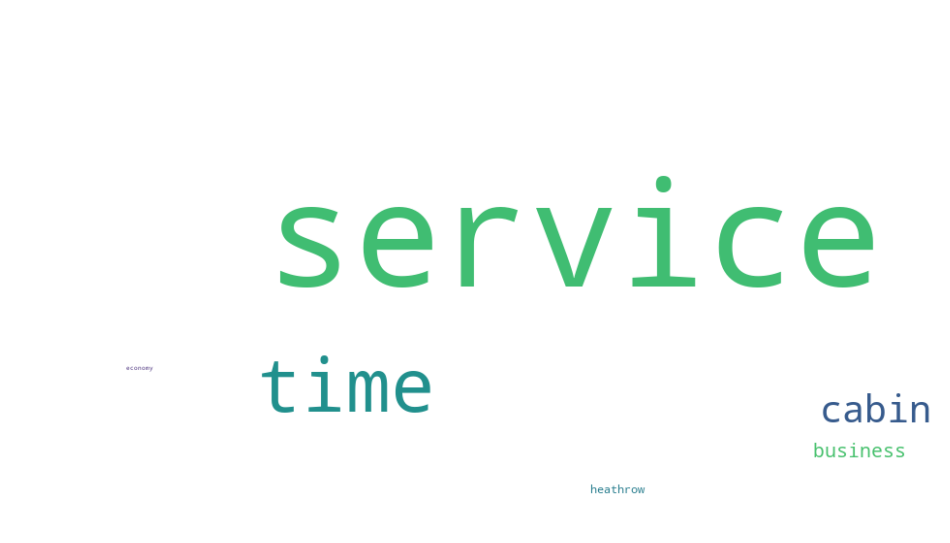

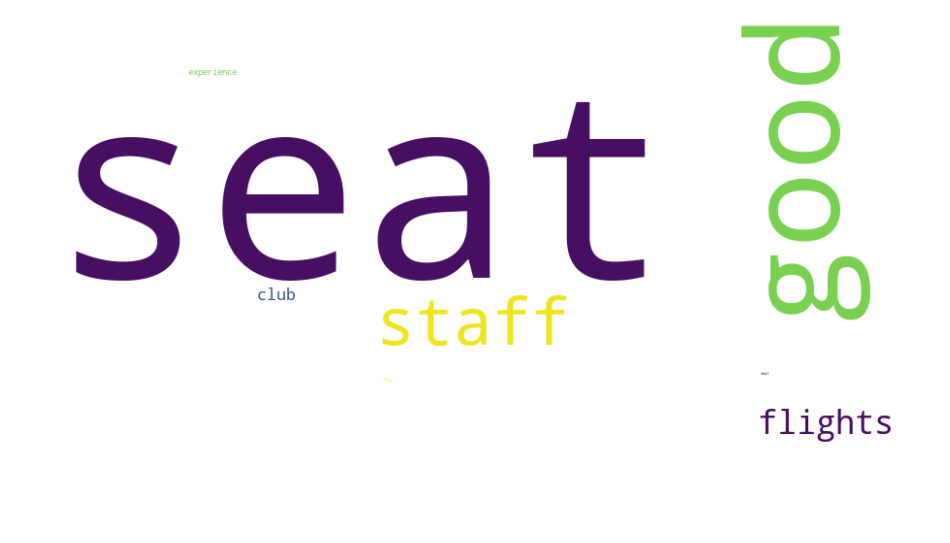

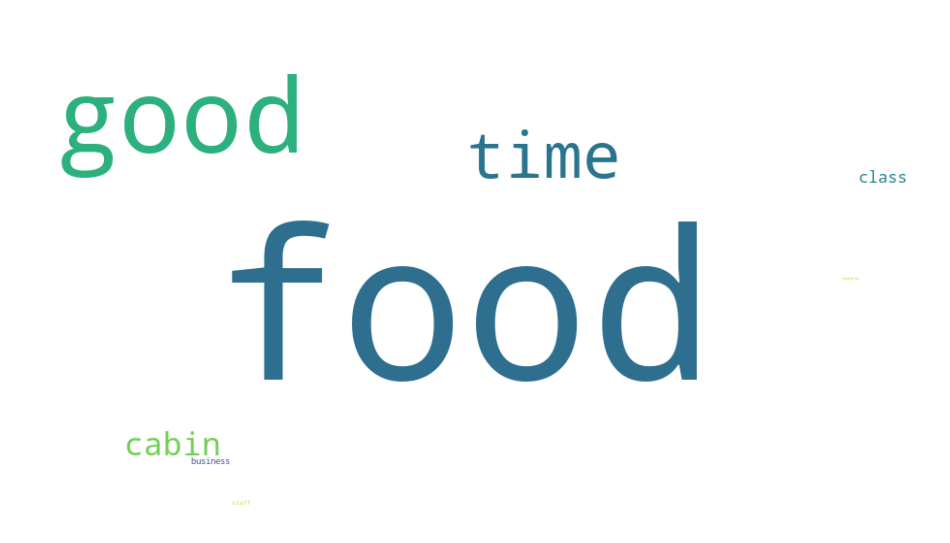

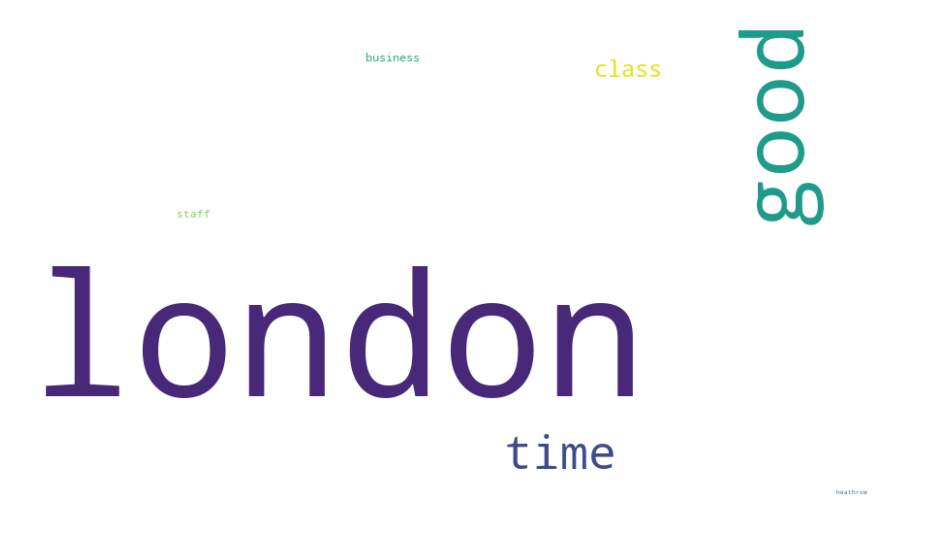

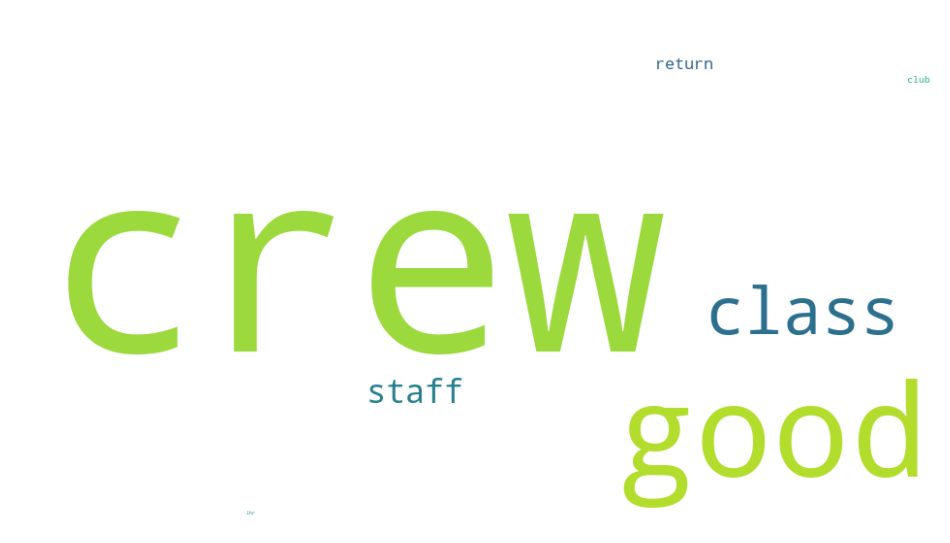

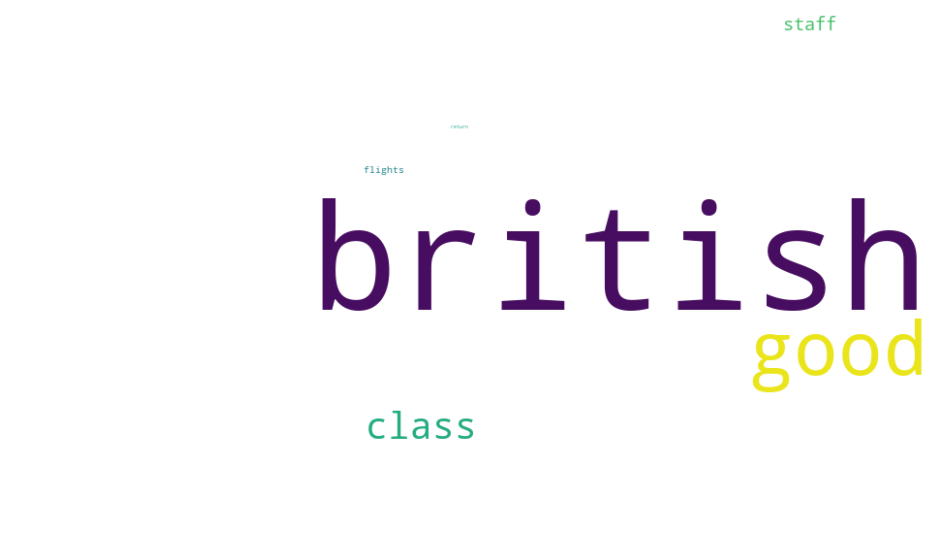

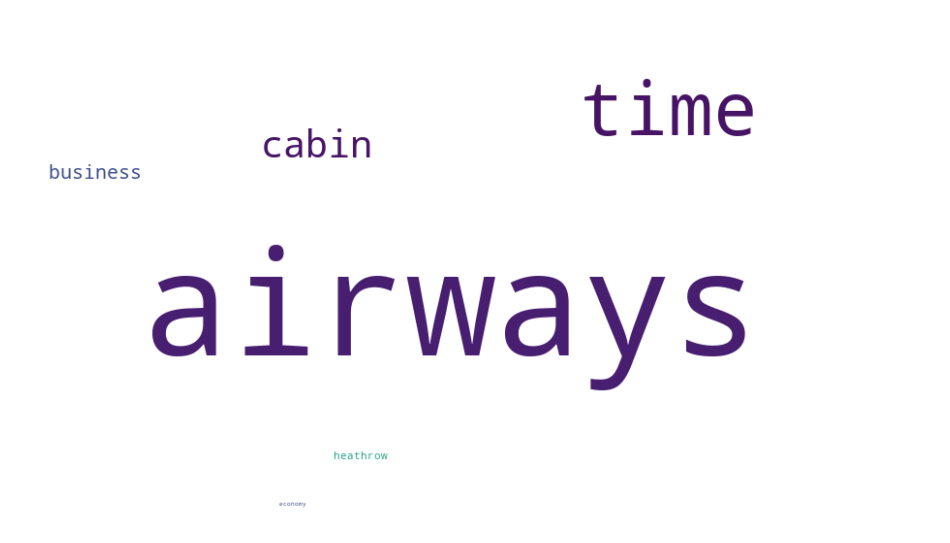

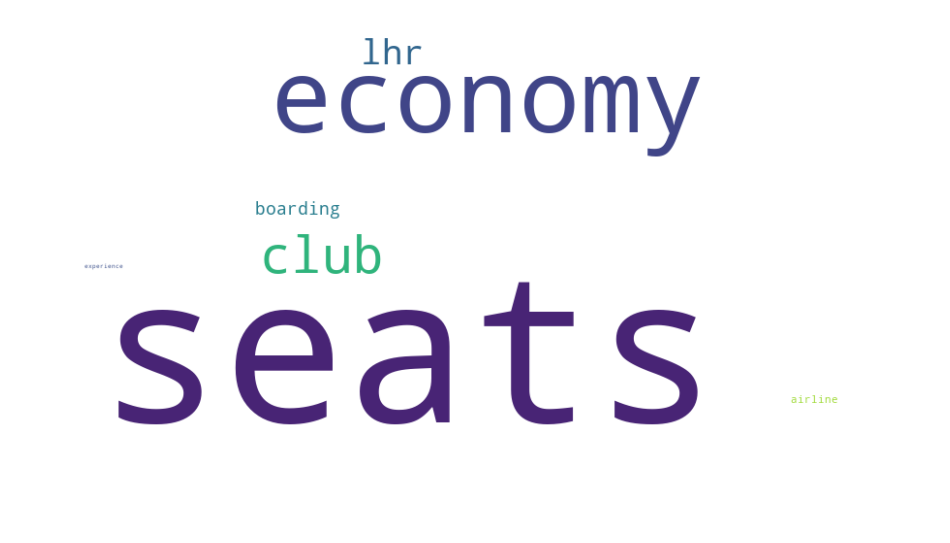

In [47]:
import warnings
warnings.filterwarnings('ignore')
wordcloud_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names())